## KMeans Clustering vs LDA Topic Modeling 
### -- using Polymerase subset of 1943 papers 


My hypothesis was instead of LDA, a visual method using wordcloud after KMeans Clustering could be helpful to find topics for each group.
I did the wordcloud before LDA to keep me blinded and prevent bias.

The results are positive. When size of papers is small enough, topics stand out of wordcloud plot for each group. I run LDA topic modeling later to verify my previous semi-manual topic modeling. Kind of see the similar results on the top-30 Most Salient Terms on pyLDAvis dashboard. For example, for group 1 of the papers, flu and children are the most salient terms for topic 1 and topic 2 for this pile of papers.

## Results


### Results from WordCloud visualizations after clustering (optimized cluster number=6): 
#### Topics for each group (see appendix plot for more details):

##### G1 flu children clinical, 456 papers  = topic 5
##### G2 gene protein cell IFN, 679 papers  = topic 6 ?
##### G3 bat host phylogenetic transmission spike, 41 papers  = topic 4
##### G4 SARS COV MERS COV, 133 papers = topic 1
##### G5 diganosis asssay detection sensitivity specificity, 222 papers  = topic 2
##### G6 RdRp RNA replication RNA synthesis, 412 papers = topic 3 ?

--------------------





### Results from LDA topic modeling for 6 groups
#### Topics for each group:

| Topic 1 | Topic 2 | Topic 3 | Topic 4 | Topic 5 | Topic 6 | 
|------|------|------|------|------|:-:|
|sars|pcr|sequence|viruses|respiratory|rna|
|cov|rt|gene|human|patients|viral|
|patients|detection|rna|hcov|viral|replication|
|infection|assay|de|species|children|protein|
|respiratory|samples|ibv|strains|influenza|cells|
|coronavirus|time|genome|bats|viruses|expression|
|mers|real|sequences|rna|infections|proteins|
|syndrome|using|strain|analysis|infection|cell|


----------------------------



## Conclusion
#### KMeans Clustering and LDA Topic Modeling produced very similar results! 
#### From the above results, most of the clustering results match the topic modeling results! 
The only exceptions are topic 3 and 6 kind of mixed clustering group 2 and 6. So the two methods can use interchangably. However, the clustering method give you the exact papers for each cluster.

#### To compare LDA topic modeling with the WordCloud method, see code of the clustering method on GitHub 
https://github.com/lj89/CORD19/blob/master/Polymerase_subset_find_topic_for_groups_after_clustering2.ipynb


#### Additional, I shoud add protein and proteins, sequence and sequences, etc, to CONTRACTION_MAP

## Appendix - WordCloud plots for each clustering group 
#### (6 groups in total)

### All papers
#### From wordcloud of all papers we do not see any information helpful to group the papers.


  <img src="https://i2.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/all1943updated.png?resize=768%2C430&ssl=1" width="800px" align="left"> 


### Group 1

#### In wordcloud of group 1, we can see the words "children" and "influenza" stand out, the word "clinical" is also pretty Salient .

<img src="https://i1.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/G1-topic-flu-children-clinical.png?resize=768%2C380&ssl=1" width="800px" align="left"> 





### Group 2
<img src="https://i1.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/G2-topic-gene-protein-cell-IFN-IBV.png?resize=768%2C380&ssl=1" width="800px" align="left"> 

### Group 3

<img src="https://i2.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/G3-topic-bat-host-phylogenetic-transmission.png?resize=768%2C386&ssl=1" width="800px" align="left"> 



### Group 4
<img src="https://i1.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/G4-SARS-COV-MERS-COV.png?resize=768%2C380&ssl=1" width="800px" align="left"> 

### Group 5
<img src="https://i1.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/G5-diganosis-asssay-detection-sensitivity-specificity.png?resize=768%2C380&ssl=1" width="800px" align="left"> 

### Group 6
<img src="https://i1.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/G6-topic-RdRp-RNA-replication-RNA-synthesis.png?resize=768%2C380&ssl=1" width="800px" align="left"> 

### KMeans clustering results (optimal 6 clusters)

<img src="https://i1.wp.com/parrotbike.wpcomstaging.com/wp-content/uploads/2020/04/6clusters.png?w=446&ssl=1" width="800px" align="left"> 

## Code
### Content

For a quicker access to each part, please use the below links. 

[Libraries and System Information](#Libraries-and-System-Information)

[Text Processing](#Text-Processing)

[Feature Extraction](#Feature-Extraction)

[Topic Modelling](#Topic-Modelling)

[Visualization](#Visualization)

[Findings](#Findings)

[References](#References)

### Libraries and System Information

In [17]:
!pip install mglearn

In [18]:
import re
import numpy as np
import nltk
from nltk.tag import UnigramTagger
from nltk.corpus import words, stopwords
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
from collections import Counter
import requests
import os
import pandas as pd
import bs4
import sys
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis.sklearn

from html.parser import HTMLParser
import spacy
from itertools import combinations 
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
from nltk.corpus import wordnet as wn
from html.parser import HTMLParser
import pprint
import string
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import time
import mglearn
from wordcloud import WordCloud
print("Below, I am providing system information.")
print("=========================================")
print("Sklearn version -",sklearn.__version__)
print("NLTK version -",nltk.__version__)
print("SpaCy version -",spacy.__version__)
print("BeautifulSoup version -",bs4.__version__)
print("Numpy version -",np.__version__)
print("Pandas version -",pd.__version__)
print("Python and Anaconda version -",sys.version)

Below, I am providing system information.
Sklearn version - 0.22.2.post1
NLTK version - 3.2.4
SpaCy version - 2.2.3
BeautifulSoup version - 4.8.2
Numpy version - 1.18.2
Pandas version - 0.25.3
Python and Anaconda version - 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


### Text Processing

As a part of standardizing the text data, I will do text processing in this part. The functions I have used to normalize the text comes from the book Text Analytics with Python A Practical Real-World Approach to Gaining Actionable Insights from Your Data by Dipanjan Sarkar[1]. The functions below are to tokenize the text, expand contractions, remove special characters, add POS tags and remove stop words. The contraction map is from GitHub of Dipanjan Sarkar[2].

In this part, I will perform HTML tags removal, special characters removal, contraction expansion, and stopwords removal. Since the data is origianlly from online, the texts have the possibilities that they contain HTML tags that do not provide much valyue to this analysis. They need to be removed before putting into feature extraction process. In case that there are special charaters in the reviews, I will remove special characters. The contraction expansion and stopwords removal are used to expand the contractions and remove the stopwords. I have added other words based on the stopwords list provided by NLTK package. 

In [19]:
stopwords = nltk.corpus.stopwords.words('english')

# page 268 adding more words into the original list
stopwords = stopwords + ['mr', 'mrs', 'family','come', 'go', 'get', 'tell', 'listen', 'one', 'two', 'three', 'four', 
                         'five', 'six', 'seven', 'eight', 'nine', 'zero', 'join', 'find', 'make', 'say', 
                         'ask', 'tell', 'see', 'try', 'back', 'also','movie',
                         '1','2','3','4','5','6','7','8','9','10','0',
                         'film', 'movie', 'watch', 'cinema', 'scene','action', 'fighting','story', '3D'
                         'show', 'get','tell', 'listen']

# github of dipanjanS [2]
CONTRACTION_MAP = {"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because",
                   "could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
                   "doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not",
                   "haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will",
                   "he'll've": "he he will have","he's": "he is","how'd": "how did","how'd'y": "how do you",
                   "how'll": "how will","how's": "how is","I'd": "I would","I'd've": "I would have","I'll": "I will",
                   "I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would","i'd've": "i would have",
                   "i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not",
                   "it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is",
                   "let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
                   "mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have",
                   "needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                   "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have",
                   "she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have",
                   "she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have",
                   "so've": "so have","so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is",
                   "there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would",
                   "they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are",
                   "they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would","we'd've": "we would have",
                   "we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not",
                   "what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is",
                   "what've": "what have","when's": "when is","when've": "when have","where'd": "where did",
                   "where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have",
                   "who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have",
                   "won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not",
                   "wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would",
                   "you'd've": "you would have","you'll": "you will","you'll've": "you will have","you're": "you are",
                   "you've": "you have"}

# Ben Brock's Analyzing Movie Reviews - Sentiment Analysis notebook
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

# page 175 to tokenize the text
def tokenize(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

# page 118 to expand the contractions
def expand_contractions(sentence, CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                                if CONTRACTION_MAP.get(match)\
                                else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence

# page 176 remove the special symbols and characters
def remove_special_characters(text):
    tokens = tokenize(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# page 120 to remove the stop words
def remove_stopwords(sentence):
    tokens = nltk.word_tokenize(sentence)
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens



Now functions have been established for the text processing, I will load the abstracts data. The data is mentioned in the book Text Analytics with Python A Practical Real-World Approach to Gaining Actionable Insights from Your Data by Dipanjan Sarkar[1]. The data is from Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies by Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher[3]. The moview review data has 50,000 rows and 2 columns. After data import, I will spilt the data into 70% training and 30% testing dataset correspondingly. 

In [20]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

In [21]:
import numpy as np # linear algebra
import pandas as pd 

review_dataset = pd.read_csv('/kaggle/input/1943polymerase/1943tibbleABSTRACT_polymeraseTitleABSGroup.csv')
print('Let us take a brief look at the data:\n',review_dataset.head())

review = np.array(review_dataset['ABS'])


Let us take a brief look at the data:
                                                title  \
0  Selective induction of interleukin-6 in mouse ...   
1  The coronavirus avian infectious bronchitis vi...   
2  Effect of sulfhydryl reagents on the infectivi...   
3  Further characterization of mouse hepatitis vi...   
4  Characterization of Kunjin virus RNA-dependent...   

                                                 ABS  G1  G2  G3  G4  G5  G6  \
0  Abstract Astrocytes produce granulocyte/macrop...   0   1   0   0   0   0   
1  Abstract Replication of avian infectious bronc...   0   0   0   0   0   1   
2  Abstract The infectivity of vesicular stomatit...   0   1   0   0   0   0   
3  Abstract Two temporally and enzymatically dist...   0   0   0   0   0   1   
4  Abstract RNA-dependent RNA polymerase (RDRP) a...   0   0   0   0   0   1   

          0         1  ...        20        21        22        23        24  \
0 -0.044346 -0.021361  ...  0.020508 -0.045924  0.030081 -0.016

In [22]:
# normalizing the train data
print('Normalize dataset needs:')
html_parser = HTMLParser()
normed_review = []
start = time.time()
for text in review:
    text = html_parser.unescape(text)
    text = expand_contractions(text, CONTRACTION_MAP)
    text = text.lower()
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    normed_review.append(text)
normed_review = [str (item) for item in normed_review]
normed_review = [item for item in normed_review if not isinstance(item, int)]

end = time.time()
print(end - start,'seconds')
print(normed_review)

Normalize dataset needs:
27.255960702896118 seconds
["['abstract', 'astrocytes', 'produce', 'granulocyte', 'macrophage', 'colony', 'stimulating', 'factor', 'gm', 'csf', 'support', 'survival', 'proliferation', 'microglia', 'study', 'functions', 'gm', 'csf', 'central', 'nervous', 'system', 'cns', 'examined', 'effects', 'gm', 'csf', 'cytokine', 'production', 'glial', 'cells', 'gm', 'csf', 'induced', 'interleukin', '6', 'il', '6', 'production', 'microglia', 'astrocytes', 'dose', 'dependent', 'manner', 'assessed', 'bioassay', 'detection', 'il', '6', 'mrna', 'reverse', 'transcriptase', 'polymerase', 'chain', 'reaction', 'rt', 'pcr', 'analysis', 'gm', 'csf', 'induce', 'tumor', 'necrosis', 'factor', 'tnf', 'il', '1', 'microglia', 'astrocytes', 'whereas', 'lipopolysaccharide', 'induced', 'cytokines', 'induction', 'il', '6', 'gm', 'csf', 'microglia', 'completely', 'inhibited', 'antibodies', 'gm', 'csf', 'neither', 'il', '3', 'macrophage', 'csf', 'csf', 'induced', 'il', '6', 'production', 'microg

[Back to Content](#Content)

### Feature Extraction

Now we have normalized them for future use. Let me establish the feature matrix.

In [23]:
# page 345 to extract features
def build_feature_matrix(documents, feature_type='frequency', ngram_range=(1, 1), min_df=0.0, max_df=1.0):
    feature_type = feature_type.lower().strip()
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf': 
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    else: 
        raise Exception("Wrong feature type entered. Possible values:'binary', 'frequency', 'tfidf'")
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    return vectorizer, feature_matrix


In [24]:
vectorizer, feature_matrix = build_feature_matrix(normed_review, feature_type='frequency',min_df=0.01, max_df=0.55)
print("The dimension of the feature matrix is",feature_matrix.shape)
feature_names = vectorizer.get_feature_names()

The dimension of the feature matrix is (1943, 1945)


[Back to Content](#Content)

### Topic Modelling

- Introduction of Topic Modelling

In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. 

- Introduction of Latent Dirichlet Allocation

In NLP, Latent Dirichlet Allocation(LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.[4] Simply saying, just like pizza and toppings, in terms of topic modelling, the composites are documents and the parts are words and/or phrases(phrases n words in length are referred to as n-grams). Here is a very straight forward plot of LDA[5]: 

<center><img src='LDA.png'></center>

- Why LDA?

If you view the number of topics as a number of clusters and the probabilities as the proportion of cluster membership, then using LDA is a way of soft-clustering composites and parts. Similar to k-Means clustering, each instance can only belong to one specific cluster but LDA allows a fuzzy membership. It adds more nuances. 

In [25]:
# lets set a base number of components
n_comp = 6
start = time.time()
# LDA set up
lda = LatentDirichletAllocation(n_components = n_comp,
                                random_state= 2019,
                                learning_method= 'online',
                                verbose = True)


data_lda_p = lda.fit_transform(feature_matrix)
end = time.time()
print(end - start,'seconds')

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
14.343647718429565 seconds


In [26]:
# print out the topics using a for loop for reviews
for idx, topic in enumerate(lda.components_):
    print("Topic",idx+1)
    print([(vectorizer.get_feature_names()[i], topic[i])
           for i in topic.argsort()[:-8 - 1:-1]])

Topic 1
[('sars', 737.0642810057102), ('cov', 723.4413586374077), ('patients', 487.44809079092045), ('infection', 368.33094704293177), ('respiratory', 355.70348035972813), ('coronavirus', 319.45974531038706), ('mers', 299.5901029957448), ('syndrome', 243.11654806162645)]
Topic 2
[('pcr', 1292.6554927315678), ('rt', 772.7101856911377), ('detection', 731.184598257176), ('assay', 617.7330315223824), ('samples', 525.4722000113746), ('time', 428.1828898206993), ('real', 340.9826169428715), ('using', 338.4803518423742)]
Topic 3
[('sequence', 400.0107109032877), ('gene', 374.3080366215453), ('rna', 349.38925408178756), ('de', 323.09174632801336), ('ibv', 282.9885663873555), ('genome', 230.32234325264517), ('sequences', 212.0694365156704), ('strain', 209.0111961210906)]
Topic 4
[('viruses', 486.01165835534596), ('human', 293.5066772785326), ('hcov', 256.15767159393283), ('species', 230.48044157292503), ('strains', 203.12167174713525), ('bats', 195.7078480603361), ('rna', 185.85035899539005), (

[Back to Content](#Content)

## Visualize Topic Modelling Results - interactive plot

Using pyLDAvis to illustration the topic modelling result. Feel free to explore the interactive results.

In [27]:
pyLDAvis.enable_notebook()

dashboard = pyLDAvis.sklearn.prepare(lda, feature_matrix, vectorizer)

dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.208833  0.024851       1        1  26.589251
5      0.136886 -0.037868       2        1  25.855749
1     -0.062280 -0.115316       3        1  17.687203
0     -0.166460 -0.007490       4        1  11.982293
2      0.212185 -0.081467       5        1   9.144101
3      0.088502  0.217289       6        1   8.741403, topic_info=     Category         Freq         Term        Total  loglift  logprob
1291  Default  1673.000000     patients  1673.000000  30.0000  30.0000
1557  Default  2862.000000          rna  2862.000000  29.0000  29.0000
1535  Default  2275.000000  respiratory  2275.000000  28.0000  28.0000
1574  Default   742.000000         sars   742.000000  27.0000  27.0000
1294  Default  1898.000000          pcr  1898.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
797    Topic6   106.692308        genes   414.884713   1.0790  -5.1785
533    Topic6   114.693002     detected   951.270718   0.3216  -5.1062
1895   Topic6   126.706967        viral  2445.897374  -0.5232  -5.0066
1189   Topic6   100.264401          new   374.307490   1.1198  -5.2406
1572   Topic6   100.903796      samples  1015.919199   0.1277  -5.2343

[404 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         1  0.291290        10
6         2  0.073196        10
6         3  0.367474        10
6         4  0.155355        10
6         5  0.098591        10
...     ...       ...       ...
1941      1  0.988520   younger
1942      4  0.030482  zoonotic
1942      6  0.960171  zoonotic
1943      3  0.919893        μl
1943      4  0.057493        μl

[961 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 2, 1, 3, 4])

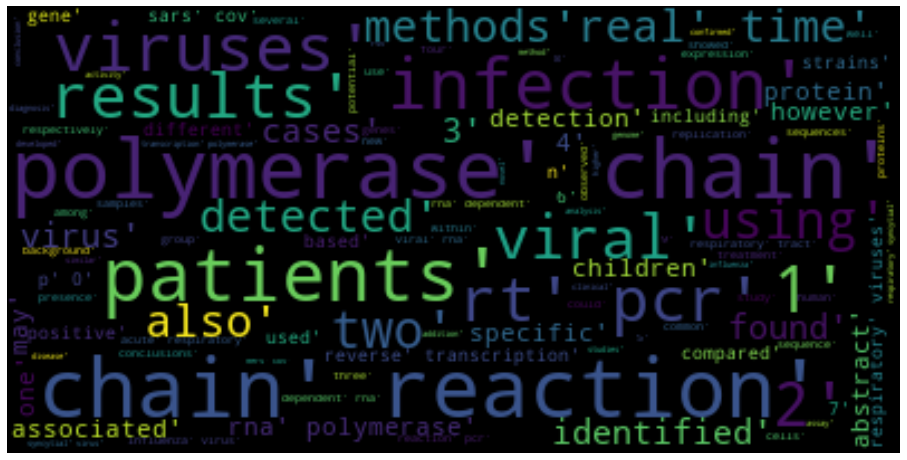

In [28]:
review_wordcloud = ' '.join(normed_review)

wordcloud = WordCloud().generate(review_wordcloud)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Findings

Topic modeling is a statistical modeling for discovering the topics that occur in a collection of documents. LDA is modeled as Dirichlet distributions and is one way of topic modelling. LDA is used to classify the text in a document to a specific topic.


| Topic 1 | Topic 2 | Topic 3 | Topic 4 | Topic 5 | Topic 6 | 
|------|------|------|------|------|:-:|
|sars|pcr|sequence|viruses|respiratory|rna|
|cov|rt|gene|human|patients|viral|
|patients|detection|rna|hcov|viral|replication|
|infection|assay|de|species|children|protein|
|respiratory|samples|ibv|strains|influenza|cells|
|coronavirus|time|genome|bats|viruses|expression|
|mers|real|sequences|rna|infections|proteins|
|syndrome|using|strain|analysis|infection|cell|

In [29]:
# more components
n_comp = 10
start = time.time()
# LDA set up
lda = LatentDirichletAllocation(n_components = n_comp,
                                random_state= 2019,
                                learning_method= 'online',
                                verbose = True)


data_lda_p = lda.fit_transform(feature_matrix)
end = time.time()
print(end - start,'seconds')

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
16.450958013534546 seconds


In [30]:
# print out the topics using a for loop for reviews
for idx, topic in enumerate(lda.components_):
    print("Topic",idx+1)
    print([(vectorizer.get_feature_names()[i], topic[i])
           for i in topic.argsort()[:-10 - 1:-1]])

Topic 1
[('respiratory', 1156.0638270806348), ('patients', 869.9182464377175), ('infection', 527.9784862292121), ('children', 501.19411831607516), ('positive', 482.0318794502866), ('cases', 446.8965507029934), ('sars', 444.076366391771), ('study', 436.58129543619935), ('results', 414.92981589413586), ('detected', 405.7133829288107)]
Topic 2
[('pcr', 1215.1417837688252), ('rt', 761.0381839078779), ('detection', 703.3686797709136), ('assay', 578.4340006398394), ('samples', 466.5763846340947), ('time', 393.0267988953305), ('real', 332.3182188222703), ('sensitivity', 319.9579708139441), ('method', 297.71460307718075), ('amplification', 293.5922869668791)]
Topic 3
[('ibv', 259.8698263143407), ('rna', 179.3438110925085), ('di', 150.7915622324138), ('infectious', 124.74541448131137), ('gene', 119.07867507921216), ('cells', 117.79931676469909), ('infected', 103.17022367685458), ('particles', 102.36058976284568), ('recombinant', 91.409776686096), ('rnas', 88.61586495089253)]
Topic 4
[('viruses'

In [31]:
pyLDAvis.enable_notebook()

dashboard = pyLDAvis.sklearn.prepare(lda, feature_matrix, vectorizer)

dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.204467 -0.008963       1        1  18.489875
0     -0.186272 -0.029901       2        1  18.481962
7     -0.215056  0.015287       3        1  15.370180
1     -0.021859 -0.097840       4        1  14.140732
8     -0.003199  0.029925       5        1  11.755828
6      0.133018 -0.099074       6        1   9.510795
4     -0.059113  0.063682       7        1   4.172587
2      0.170302 -0.204210       8        1   4.167895
3      0.189779  0.297233       9        1   2.197680
9     -0.212067  0.033860      10        1   1.712465, topic_info=     Category         Freq         Term        Total  loglift  logprob
1902  Default  1986.000000      viruses  1986.000000  30.0000  30.0000
1557  Default  2827.000000          rna  2827.000000  29.0000  29.0000
1535  Default  2276.000000  respiratory  2276.000000  28.0000  28.0000
474   Default   759.000000          cov   759.000000  27.0000  27.0000
1294  Default  1901.000000          pcr  1901.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
1551  Topic10    17.362370   rhinovirus   262.967878   1.3495  -5.3640
126   Topic10    18.517094     abstract   454.357053   0.8670  -5.2996
1902  Topic10    21.761151      viruses  1986.578334  -0.4468  -5.1382
1345  Topic10    19.518052     positive  1049.892299   0.0821  -5.2470
533   Topic10    17.957513     detected   941.692739   0.1076  -5.3303

[615 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         1  0.023888        10
6         2  0.243362        10
6         3  0.147809        10
6         4  0.303083        10
6         5  0.037325        10
...     ...       ...       ...
1936      7  0.007454     years
1936     10  0.027331     years
1942      7  0.955713  zoonotic
1942     10  0.031335  zoonotic
1943      4  0.967442        μl

[1817 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 8, 2, 9, 7, 5, 3, 4, 10])

In [32]:
## 6 groups seem to have better separations among groups

### References

[1] Text Analytics with Python A Practical Real-World Approach to Gaining Actionable Insights from Your Data by Dipanjan Sarkar.

[2] https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/contractions.py

[3] http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.bib

[4] https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

[5] https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d

[6] Nuoya_Rezsonya_Topic_Modelling_code